In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


k=3.9e6          # a constant with units of Gpc^{-3} yr^{-3/37}
t_0=13.78e9      # in units of years
t=13.38e9        # in units of years , let t=t_0 (i.e. calcluating the merger rate today)

f_pbh=4.3e-3
f=(0.85*f_pbh)               #f_pbh=f/0.85 ie. f=0.85*f_pbh
σ_eq=0.005
 
    
T=((t/t_0)**(-34/37))
    
def h(m_1,m_2):
    return (((m_1*m_2)**(3/37))*((m_1+m_2)**(36/37)))

def g(f):
    return (((f**2) + (σ_eq**2))**(-21/74))

def PDF(m_1,m_2):
    return  (((P(m_1)/m_1)+(P(m_2)/m_2))*(np.minimum((P(m_1)/m_1),(P(m_2)/m_2))))


def merger_rate(m_1,m_2):
    return (k*T*(f**2)*g(f)*PDF(m_1,m_2)*h(m_1,m_2))
   
    
# Calculation of the 1d merger rate for Power Law PDF    
α = 1.6
M=5
def P(m): #Powerlaw PBH mass distribution
    return (((α-1)/M)*((m/M)**(-α)))


print("PDF",PDF(8,6))
print("h=",'%0.3f'%h(8,6))
print("g=",'%0.3f'%g(0.85*f_pbh))
print("PDF=",'%0.3e'%PDF(8,6))
print("Merger Rate=",'%0.4f'%merger_rate(8,6),"Gpc^-3 yr^-1" )

PDF 0.00015564593976245
h= 17.843
g= 17.915
PDF= 1.556e-04
Merger Rate= 2.6633 Gpc^-3 yr^-1


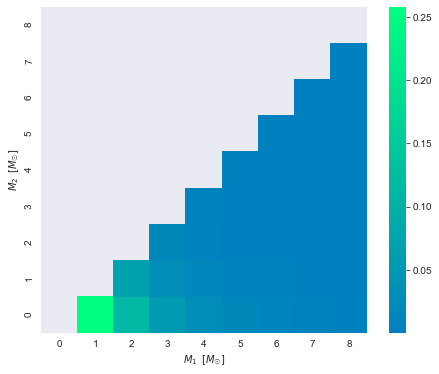

In [25]:
m_1 = np.geomspace(5, 100, 10)
m_2 = np.geomspace(5, 100, 10)



Δ_1_arr=np.zeros(len(m_1)-1)
for i in range(len(m_1)-1):         
    a=(m_1[i+1] - m_1[i])
    b=((m_1[i+1] + m_1[i])/2)
    Δ_1_arr[i]=(a/b)
    


Δ=Δ_1_arr[0]

    
m_1_arr=np.zeros(len(m_1)-1)
for i in range(len(m_1)-1):          #calculation of x_c and y_c.
    m_1_arr[i]=(m_1[i]+m_1[i+1])/2
    
 
    
m_2_arr=np.zeros(len(m_2)-1)
for i in range(len(m_2)-1):
    m_2_arr[i]=(m_2[i]+m_2[i+1])/2    #calculation of x_c and y_c.
    
    
    
M_1,M_2=np.meshgrid(m_1_arr,m_2_arr)


plt.figure(figsize=(8,6))

Merger_12=(merger_rate(M_1,M_2)*(Δ**2))



# Can be great to plot only a half matrix
mask = np.zeros_like(Merger_12)  #created an array of shape Merger_12 with all the elements in it being 0.
mask[np.tril_indices_from(mask)] = True   # Generate a mask for the lower triangle.

with sns.axes_style("darkgrid"):
    ax = sns.heatmap(Merger_12, mask=mask, square=True,  cmap="winter", cbar=True, center=0)
    ax.invert_yaxis()
    plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
    plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
    plt.show()    